### Catenary
   
To minimize the potential energy $V = m g y$ along the length of the wire, with mass $\rho ds$ where $\rho$ is the density or mass per unit length.   
   
$$ \delta F = \int_{-a}^a \rho g y ds = \int_{-a}^a \rho g y \sqrt{\left(1+ \left( y'\right)^2\right)} dx$$
   
where $y' = \frac{dy}{dx}$.  
   
The Lagrangian is $\mathscr L = \rho g y \sqrt{1+ \left(y'\right)^2}$ and since it does not depend explicitly on $x$, the Beltrami equation is applied...
   
$$ \mathscr L - y' \frac{\partial \mathscr L}{\partial y'} = C \qquad(1)$$
   
Then set $U=(1+ \left(y'\right)^2) $, then $\frac{dU}{dy'} = 2 y'$ and then $V=U^{1/2}$ so $\frac{dV}{dU} = \frac{1}{2}U^{-1/2}$. 

$$ \frac{\partial \mathscr L}{\partial y'} =  \rho g \frac{\partial y}{\partial y'}V +\rho g y \frac{\partial V}{\partial U}\frac{\partial U}{\partial y'} = \rho g \frac{yy'}{\sqrt{1+\left(y'\right)^2}}$$
   
Therefore (1) becomes
   
$$ \rho g y \sqrt{1+ \left(y'\right)^2} -  \rho g \frac{y \left(y'\right)^2}{\sqrt{1+\left(y'\right)^2}} = C$$
   
dividing $C$ into $\rho g$ will make another constant, so $D = \left(\frac{C}{\rho g}\right)$. and putting the L.H.S under a common denominator 
   
$$   \frac{y\left(1+ \left(y'\right)^2\right) -y\left(y'\right)^2}{\sqrt{1+\left(y'\right)^2}} = \frac{y}{\sqrt{1+\left(y'\right)^2}} = D$$

   
Then
   
$$   y = D\sqrt{1+\left(y'\right)^2}$$
   
    
$$\implies   \frac{y^2 -D^2}{D^2} = \left(\frac{dy}{dx}\right)^2$$   
so 
   
$$ x = \int \frac{1}{\sqrt{\frac{y^2 -D^2}{D^2}}} dy = \int \frac{D}{\sqrt{y^2 -D^2}}dy = D \cosh^{-1}\left(\frac{y}{D}\right) + E$$

where $E$ is the constant of integration. Then 
   
$ y = \frac{C}{\rho g} \cosh\left(\frac{\rho g x -E}{C}\right)$ 

\frac{1}{}

In [5]:
from sympy import *
init_printing()
   
x,y = symbols("x,y")
D = symbols("D")
   
sol = D*integrate(1/sqrt(y**2-D**2),y)
sol

  ⎛⎧                │ 2│    ⎞
  ⎜⎪      ⎛y⎞       │y │    ⎟
  ⎜⎪ acosh⎜─⎟   for │──│ > 1⎟
  ⎜⎪      ⎝D⎠       │ 2│    ⎟
D⋅⎜⎨                │D │    ⎟
  ⎜⎪                        ⎟
  ⎜⎪       ⎛y⎞              ⎟
  ⎜⎪-ⅈ⋅asin⎜─⎟   otherwise  ⎟
  ⎝⎩       ⎝D⎠              ⎠

In [17]:
E = symbols("E")
rho, g, C = symbols("rho, g, C")
x_val = solve(x-D*acosh(y/D) - E,y)[0].subs({D:C/(rho*g)}) 
x_val

Now using arguments from
   
http://www.dmf.unicatt.it/divulgazione/mateott/catenaria/catenary/catenary.htm
   
we can design our catenary held at -a = -10 and a = 10
The value y is probematic, since we did not choose to use constraints. Attempting to add 
in the constraints to resolve the constants afterwards is a slapstick affair 

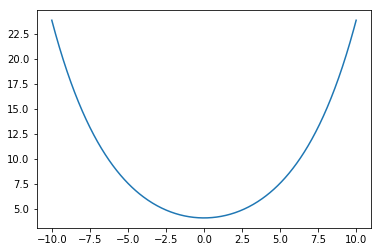

In [45]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

xx = np.linspace(-10,10,400)

plt.plot(xx, (40/9.81)*np.cosh(9.81*xx/40))
plt.show()

In [64]:
from __future__ import division
alpha = symbols("alpha")
nsolve(alpha*sinh(10/alpha)-20,1)

# here C*sinh(10/C) -20, with 20 as the initial value of y
# some values mysteriously don't work, i.e. 10,
# so a Catenary starting at (-10,20) has a value 
# alpha = C/9.81

In [65]:
4.5928*9.81 

# this is C

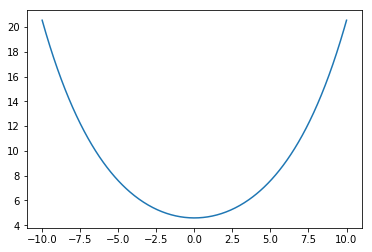

In [66]:
plt.plot(xx, (45/9.81)*np.cosh(9.81*xx/45))
plt.show()

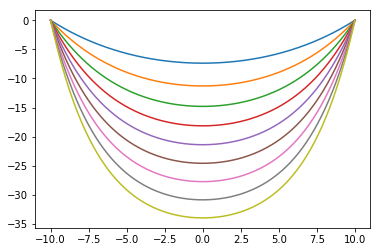

In [95]:
# the arc length of this curve can be chosen 
# using the results from the linked resource

c2 = C * cosh(10/C)-10
y_expr = C* cosh(x/C) + c2 
for i in range(13,40,3):
    C_val = nsolve(alpha*sinh(10/alpha)-i,1)
    yy = 40-(40-float(C_val)* np.cosh(xx/float(C_val)) + float(C_val)*np.cosh(10/float(C_val)))
    plt.plot(xx, yy)
plt.show()

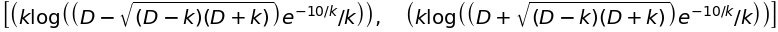

In [81]:
k,a,F,D = symbols("k,a,F,D")
y1 = k*cosh((a+F)/k) - D
y2 = k*cosh((a-F)/k) - D + 5
solve({y1.subs({a:10}),y1.subs({a:10})},F)